In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('country_vaccinations.csv')
df.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                            35.0   
2                                  NaN                            35.0   
3                                  NaN                            35.0   
4                                  NaN                            35.0   

             vaccines                source_name  \
0  Oxford/AstraZeneca  Government of Afghanistan   
1  Oxford/AstraZeneca  Government of Afghanistan   
2  Oxford/AstraZeneca  Government of Afghanistan   
3  Oxford/AstraZeneca  Government of Afghanistan   
4  Oxford/AstraZeneca  Government of Afghanistan   

                                      source_website  
0  http://www.xinhuanet.com/english/asiapacific/2...  
1  http://www.xinhuanet.com/english/asiapacific/2...  
2  http://www.xinhuanet.com/english/asiapacific/2...  
3  http://www.xinhuanet.com/english/asiapacific/2...  
4  http://www.xinhuanet.com/english/asiapacific/2...

# Data Cleaning

In [7]:
df

country iso_code        date  total_vaccinations  people_vaccinated  \
0     Afghanistan      AFG  2021-02-22                 0.0                0.0   
1     Afghanistan      AFG  2021-02-23                 NaN                NaN   
2     Afghanistan      AFG  2021-02-24                 NaN                NaN   
3     Afghanistan      AFG  2021-02-25                 NaN                NaN   
4     Afghanistan      AFG  2021-02-26                 NaN                NaN   
...           ...      ...         ...                 ...                ...   
9571     Zimbabwe      ZWE  2021-03-29             81610.0            69751.0   
9572     Zimbabwe      ZWE  2021-03-30             85866.0            72944.0   
9573     Zimbabwe      ZWE  2021-03-31             91880.0            76995.0   
9574     Zimbabwe      ZWE  2021-04-01            105307.0            87791.0   
9575     Zimbabwe      ZWE  2021-04-02            124753.0           103815.0   

      people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                         NaN                     NaN                 NaN   
1                         NaN                     NaN              1367.0   
2                         NaN                     NaN              1367.0   
3                         NaN                     NaN              1367.0   
4                         NaN                     NaN              1367.0   
...                       ...                     ...                 ...   
9571                  11859.0                  2471.0              5434.0   
9572                  12922.0                  4256.0              5810.0   
9573                  14885.0                  6014.0              5712.0   
9574                  17516.0                 13427.0              6617.0   
9575                  20938.0                 19446.0              8156.0   

      total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                               0.00                           0.00   
1                                NaN                            NaN   
2                                NaN                            NaN   
3                                NaN                            NaN   
4                                NaN                            NaN   
...                              ...                            ...   
9571                            0.55                           0.47   
9572                            0.58                           0.49   
9573                            0.62                           0.52   
9574                            0.71                           0.59   
9575                            0.84                           0.70   

      people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                     NaN                             NaN   
1                                     NaN                            35.0   
2                                     NaN                            35.0   
3                                     NaN                            35.0   
4                                     NaN                            35.0   
...                                   ...                             ...   
9571                                 0.08                           366.0   
9572                                 0.09                           391.0   
9573                                 0.10                           384.0   
9574                                 0.12                           445.0   
9575                                 0.14                           549.0   

                vaccines                source_name  \
0     Oxford/AstraZeneca  Government of Afghanistan   
1     Oxford/AstraZeneca  Government of Afghanistan   
2     Oxford/AstraZeneca  Government of Afghanistan   
3     Oxford/AstraZeneca  Government of Afghanistan   
4     Oxford/AstraZeneca  Government of Afghanistan   
... 

In [22]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bhutan',
       'Bolivia', 'Brazil', 'Brunei', 'Bulgaria', 'Cambodia', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Chile', 'China', 'Colombia',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Faeroe Islands', 'Falkland Islands', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece',
       'Greenland', 'Grenada', 'Guatemala', 'Guernsey', 'Guinea',
       'Guyana', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Isle of Man', 'Israel',
       'Italy', 'Jamai

In [23]:
len(df['country'].unique())

166

In [43]:
df_cambodia = df[df['country'] == 'Cambodia']
df_cambodia_feb = df_cambodia.iloc[:20]
df_cambodia_march = df_cambodia.iloc[20:]
df_cambodia_march

country iso_code        date  total_vaccinations  people_vaccinated  \
1392  Cambodia      KHM  2021-03-01             24331.0            24331.0   
1393  Cambodia      KHM  2021-03-02             33211.0            33211.0   
1394  Cambodia      KHM  2021-03-03             40910.0            40910.0   
1395  Cambodia      KHM  2021-03-04                 NaN                NaN   
1396  Cambodia      KHM  2021-03-05                 NaN                NaN   
1397  Cambodia      KHM  2021-03-06             66847.0            66847.0   
1398  Cambodia      KHM  2021-03-07             71185.0            71185.0   
1399  Cambodia      KHM  2021-03-08             77963.0            77963.0   
1400  Cambodia      KHM  2021-03-09             89506.0            89506.0   
1401  Cambodia      KHM  2021-03-10            109854.0           109854.0   
1402  Cambodia      KHM  2021-03-11            129908.0           129908.0   
1403  Cambodia      KHM  2021-03-12            147591.0           147591.0   
1404  Cambodia      KHM  2021-03-13            161818.0           161818.0   
1405  Cambodia      KHM  2021-03-14            170659.0           170659.0   
1406  Cambodia      KHM  2021-03-15            170659.0           170659.0   
1407  Cambodia      KHM  2021-03-16                 NaN                NaN   
1408  Cambodia      KHM  2021-03-17                 NaN                NaN   
1409  Cambodia      KHM  2021-03-18                 NaN                NaN   
1410  Cambodia      KHM  2021-03-19                 NaN                NaN   
1411  Cambodia      KHM  2021-03-20                 NaN                NaN   
1412  Cambodia      KHM  2021-03-21                 NaN                NaN   
1413  Cambodia      KHM  2021-03-22                 NaN                NaN   
1414  Cambodia      KHM  2021-03-23            281123.0           222726.0   
1415  Cambodia      KHM  2021-03-24            296149.0           229079.0   

      people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
1392                      NaN                     NaN              2479.0   
1393                      NaN                  8880.0              3634.0   
1394                      NaN                  7699.0              4354.0   
1395                      NaN                     NaN              5208.0   
1396                      NaN                     NaN              6042.0   
1397                      NaN                     NaN              6876.0   
1398                      NaN                  4338.0              7094.0   
1399                      NaN                  6778.0              7662.0   
1400                      NaN                 11543.0              8042.0   
1401                      NaN                 20348.0              9849.0   
1402                      NaN                 20054.0             11479.0   
1403                      NaN                 17683.0             12770.0   
1404                      NaN                 14227.0             13567.0   
1405                      NaN                  8841.0             14211.0   
1406                      NaN                     0.0             13242.0   
1407                      NaN                     NaN             13566.0   
1408                      NaN                     NaN             12632.0   
1409                      NaN                     NaN             11739.0   
1410                      NaN                     NaN             11186.0   
1411                      NaN                     NaN             11126.0   
1412                      NaN                     NaN             11835.0   
1413                      NaN                     NaN             13808.0   
1414                  58397.0                     NaN             13808.0   
1415                  67070.0                 15026.0             13982.0   

      total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
1392                            0.15                       

Text(0.5, 1.0, 'March')

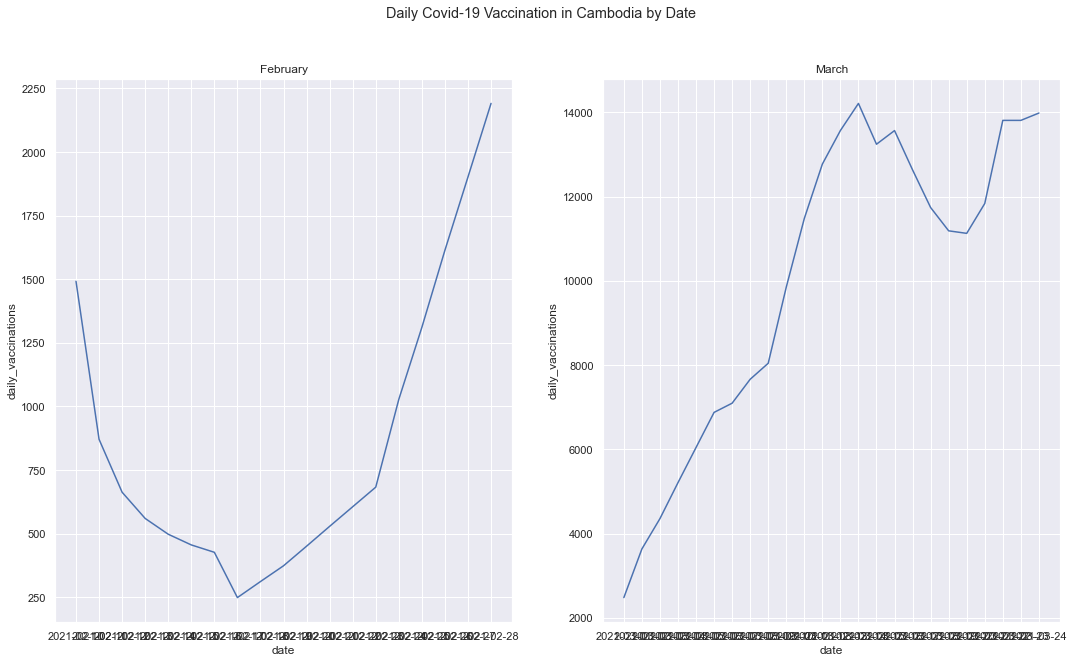

In [44]:
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

fig.suptitle('Daily Covid-19 Vaccination in Cambodia by Date')

sns.lineplot(ax=axes[0], data=df_cambodia_feb, x='date', y='daily_vaccinations')
axes[0].set_title('February')

sns.lineplot(ax=axes[1], data=df_cambodia_march, x='date', y='daily_vaccinations')
axes[1].set_title('March')

# What vaccination schemes (combination of vaccines) are used and in which countries?

In [50]:
country_group = df.groupby('country')
# To see all the row remove the # in the next line
# pd.set_option('display.max_rows', None) 
df2 = country_group.apply(lambda x: x['vaccines'].unique())
df2 = df2.apply(pd.Series)
df2


0
country                                         
Afghanistan                   Oxford/AstraZeneca
Albania                 Pfizer/BioNTech, Sinovac
Algeria                                Sputnik V
Andorra                          Pfizer/BioNTech
Angola                        Oxford/AstraZeneca
...                                          ...
Uruguay                 Pfizer/BioNTech, Sinovac
Venezuela                              Sputnik V
Vietnam                       Oxford/AstraZeneca
Wales        Oxford/AstraZeneca, Pfizer/BioNTech
Zimbabwe                       Sinopharm/Beijing

[166 rows x 1 columns]

# What is the vaccine used in the largest number of countries?

In [74]:
vaccines_group = df.groupby('vaccines')
# To see all the row remove the # in the next line
pd.set_option('display.max_rows', None) 
df3 = vaccines_group.apply(lambda x: x['country'].nunique())
df3 = df3.apply(pd.Series)
df3 = pd.DataFrame(df3)
df3

0
vaccines                                              
Covaxin, Oxford/AstraZeneca                          1
EpiVacCorona, Sputnik V                              1
Johnson&Johnson                                      1
Johnson&Johnson, Moderna, Pfizer/BioNTech            1
Moderna                                              1
Moderna, Oxford/AstraZeneca                          1
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech        26
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, S...   1
Moderna, Pfizer/BioNTech                             5
Oxford/AstraZeneca                                  46
Oxford/AstraZeneca, Pfizer/BioNTech                 13
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/...   1
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/...   2
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac         2
Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V       1
Oxford/AstraZeneca, Sinopharm/Beijing                3
Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V     2
Oxford/AstraZeneca, Sinovac                          5
Pfizer/BioNTech                                     20
Pfizer/BioNTech, Sinopharm/Beijing                   2
Pfizer/BioNTech, Sinovac                             7
Pfizer/BioNTech, Sinovac, Sputnik V                  1
Sinopharm/Beijing                                   10
Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac          1
Sinopharm/Beijing, Sputnik V                         2
Sinovac                                              1
Sputnik V                                            9

In [62]:
df3.sum()

0    166
dtype: int64

# What country has vaccinated more people?

In [68]:
df['date'] = pd.to_datetime(df['date'])

In [69]:
df = df.sort_values('date', ascending=True)

In [70]:
df

country  iso_code       date  total_vaccinations  \
7664              Scotland  OWID_SCT 2020-12-13             19009.0   
9421                 Wales  OWID_WLS 2020-12-13              8257.0   
6347      Northern Ireland  OWID_NIR 2020-12-13              3623.0   
2587               England  OWID_ENG 2020-12-13             55576.0   
9103        United Kingdom       GBR 2020-12-13             86465.0   
...                    ...       ...        ...                 ...   
1731                 Chile       CHL 2021-04-03          10784941.0   
3766             Hong Kong       HKG 2021-04-03            544000.0   
4036                 India       IND 2021-04-03          75979651.0   
9102  United Arab Emirates       ARE 2021-04-03           8559291.0   
7356                Russia       RUS 2021-04-03          12038859.0   

      people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
7664            19009.0                      NaN                     NaN   
9421             8257.0                      NaN                     NaN   
6347             3623.0                      NaN                     NaN   
2587            55576.0                      NaN                     NaN   
9103            86465.0                      NaN                     NaN   
...                 ...                      ...                     ...   
1731          6939461.0                3845480.0                  2985.0   
3766           475100.0                  68900.0                 12800.0   
4036         65739470.0               10240181.0               2925356.0   
9102                NaN                      NaN                 67909.0   
7356          7445035.0                4593824.0                259564.0   

      daily_vaccinations  total_vaccinations_per_hundred  \
7664                 NaN                            0.35   
9421                 NaN                            0.26   
6347                 NaN                            0.19   
2587                 NaN                            0.10   
9103                 NaN                            0.13   
...                  ...                             ...   
1731            161328.0                           56.42   
3766             13543.0                            7.26   
4036           2244267.0                            5.51   
9102             85658.0                           86.54   
7356            229279.0                            8.25   

      people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
7664                           0.35                                  NaN   
9421                           0.26                                  NaN   
6347                           0.19                                  NaN   
2587                           0.10                                  NaN   
9103                           0.13                                  NaN   
...                             ...                                  ...   
1731                          36.30                                20.12   
3766                           6.34                                 0.92   
4036                           4.76                                 0.74   
9102                            NaN                                  NaN   
7356                           5.10                                 3.15   

      daily_vaccinations_per_million  \
7664                             NaN   
9421                             NaN   
6347                             NaN   
2587                             NaN   
9103                             NaN   
...                              ...   
1731                          8439.0   
3766                          1806.0   
4036                          1626.0   
9102                          8661.0   
7356                          1571.0   

                                               vaccines  \
7664                Oxford/AstraZeneca, Pfizer/BioNTech   
9421                

In [72]:
df.date.max()

Timestamp('2021-04-03 00:00:00')

In [94]:
df_latest_date = df[(df['date'] >= '2021-03-22') & (df['date']<=df.date.max())]
df_latest_date.sort_values(['date', 'people_vaccinated'], ascending=[False, False], inplace=True)
df_latest_date = df_latest_date[df_latest_date['people_vaccinated'].notna()]
indexNames = df_latest_date[ (df_latest_date['country'] == 'England') | (df_latest_date['country'] == 'Scotland') ].index
df_latest_date.drop(indexNames , inplace=True)
df_latest_date

<ipython-input-94-9019ebe917e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest_date.sort_values(['date', 'people_vaccinated'], ascending=[False, False], inplace=True)


country  iso_code       date  total_vaccinations  \
9318          United States       USA 2021-04-03         161688422.0   
4036                  India       IND 2021-04-03          75979651.0   
1273                 Brazil       BRA 2021-04-03          20956770.0   
8882                 Turkey       TUR 2021-04-03          16602919.0   
5704                 Mexico       MEX 2021-04-03           8987190.0   
4554                  Italy       ITA 2021-04-03          10990307.0   
7356                 Russia       RUS 2021-04-03          12038859.0   
1731                  Chile       CHL 2021-04-03          10784941.0   
8437                  Spain       ESP 2021-04-03           8548598.0   
1526                 Canada       CAN 2021-04-03           6258003.0   
782              Bangladesh       BGD 2021-04-03           5452634.0   
4456                 Israel       ISR 2021-04-03          10071823.0   
6000                Morocco       MAR 2021-04-03           8240870.0   
388               Argentina       ARG 2021-04-03           4178896.0   
2278                Czechia       CZE 2021-04-03           1797403.0   
3462                 Greece       GRC 2021-04-03           1830362.0   
3014                Finland       FIN 2021-04-03           1061536.0   
8347            South Korea       KOR 2021-04-03            989381.0   
9354                Uruguay       URY 2021-04-03            784804.0   
610              Azerbaijan       AZE 2021-04-03            924813.0   
714                 Bahrain       BHR 2021-04-03            797924.0   
3766              Hong Kong       HKG 2021-04-03            544000.0   
1131                 Bhutan       BTN 2021-04-03            459752.0   
1371               Bulgaria       BGR 2021-04-03            502078.0   
8264               Slovenia       SVN 2021-04-03            397882.0   
2811                Estonia       EST 2021-04-03            282946.0   
5076                Lebanon       LBN 2021-04-03            225842.0   
5026                 Latvia       LVA 2021-04-03            146752.0   
6710              Palestine       PSE 2021-04-03            100386.0   
5377                  Macao       MAC 2021-04-03             54704.0   
9420                Vietnam       VNM 2021-04-03             52335.0   
3957                Iceland       ISL 2021-04-03             74603.0   
4350            Isle of Man       IMN 2021-04-03             54075.0   
5896             Montenegro       MNE 2021-04-03             26972.0   
6275        North Macedonia       MKD 2021-04-03              9003.0   
4840                 Kosovo  OWID_KOS 2021-04-03               700.0   
1275                 Brunei       BRN 2021-04-03               340.0   
9317          United States       USA 2021-04-02         157606463.0   
4035                  India       IND 2021-04-02          73054295.0   
9213         United Kingdom       GBR 2021-04-02          36631187.0   
1272                 Brazil       BRA 2021-04-02          20632877.0   
3258                Germany       DEU 2021-04-02          14374088.0   
8881                 Turkey       TUR 2021-04-02          16317170.0   
3111                 France       FRA 2021-04-02          12139523.0   
4117              Indonesia       IDN 2021-04-02          12292491.0   
5703                 Mexico       MEX 2021-04-02           8644446.0   
4553                  Italy       ITA 2021-04-02          10781767.0   
7355                 Russia       RUS 2021-04-02          11779295.0   
1730                  Chile       CHL 2021-04-02          10781956.0   
1525                 Canada       CAN 2021-04-02           6057090.0   
4455                 Israel       ISR 2021-04-02          10068757.0   
7003                 Poland       POL 2021-04-02           6614819.0   
5999                Morocco       MAR 2021-04-02           8171651.0   
387               Argentina       ARG 2021-04-02           4123152.0   
3862                Hungary       HUN 2021-04-02           3

In [96]:
df_latest_02_april = df_latest_date[df_latest_date['date']=='2021-04-02	']
df_latest_02_april

country  iso_code       date  total_vaccinations  \
9317     United States       USA 2021-04-02         157606463.0   
4035             India       IND 2021-04-02          73054295.0   
9213    United Kingdom       GBR 2021-04-02          36631187.0   
1272            Brazil       BRA 2021-04-02          20632877.0   
3258           Germany       DEU 2021-04-02          14374088.0   
8881            Turkey       TUR 2021-04-02          16317170.0   
3111            France       FRA 2021-04-02          12139523.0   
4117         Indonesia       IDN 2021-04-02          12292491.0   
5703            Mexico       MEX 2021-04-02           8644446.0   
4553             Italy       ITA 2021-04-02          10781767.0   
7355            Russia       RUS 2021-04-02          11779295.0   
1730             Chile       CHL 2021-04-02          10781956.0   
1525            Canada       CAN 2021-04-02           6057090.0   
4455            Israel       ISR 2021-04-02          10068757.0   
7003            Poland       POL 2021-04-02           6614819.0   
5999           Morocco       MAR 2021-04-02           8171651.0   
387          Argentina       ARG 2021-04-02           4123152.0   
3862           Hungary       HUN 2021-04-02           3126733.0   
7246           Romania       ROU 2021-04-02           3203876.0   
1885          Colombia       COL 2021-04-02           2336144.0   
9531             Wales  OWID_WLS 2021-04-02           1936088.0   
1013           Belgium       BEL 2021-04-02           2036152.0   
7899            Serbia       SRB 2021-04-02           2521863.0   
533            Austria       AUT 2021-04-02           1727929.0   
2277           Czechia       CZE 2021-04-02           1783746.0   
3461            Greece       GRC 2021-04-02           1777502.0   
3013           Finland       FIN 2021-04-02           1054985.0   
8346       South Korea       KOR 2021-04-02            979936.0   
8502         Sri Lanka       LKA 2021-04-02            923954.0   
4616             Japan       JPN 2021-04-02           1096698.0   
6457  Northern Ireland  OWID_NIR 2021-04-02            932502.0   
2375           Denmark       DNK 2021-04-02           1156996.0   
8166          Slovakia       SVK 2021-04-02           1006605.0   
9353           Uruguay       URY 2021-04-02            772120.0   
6876              Peru       PER 2021-04-02            857493.0   
609         Azerbaijan       AZE 2021-04-02            889033.0   
713            Bahrain       BHR 2021-04-02            782530.0   
3765         Hong Kong       HKG 2021-04-02            531200.0   
1130            Bhutan       BTN 2021-04-02            453595.0   
1370          Bulgaria       BGR 2021-04-02            498085.0   
7814           Senegal       SEN 2021-04-02            288319.0   
9013           Ukraine       UKR 2021-04-02            286647.0   
8263          Slovenia       SVN 2021-04-02            397882.0   
2810           Estonia       EST 2021-04-02            279012.0   
5394            Malawi       MWI 2021-04-02            154801.0   
5572             Malta       MLT 2021-04-02            209065.0   
5075           Lebanon       LBN 2021-04-02            225708.0   
5025            Latvia       LVA 2021-04-02                 NaN   
3575         Guatemala       GTM 2021-04-02            112751.0   
9575          Zimbabwe       ZWE 2021-04-02            124753.0   
8801           Tunisia       TUN 2021-04-02             70769.0   
5376             Macao       MAC 2021-04-02             53626.0   
9419           Vietnam       VNM 2021-04-02             52091.0   
2014     Cote d'Ivoire       CIV 2021-04-02             45247.0   
4349       Isle of Man       IMN 2021-04-02             52831.0   
3365         Gibraltar       GIB 2021-04-02             60907.0   
8542          Suriname       SUR 2021-04-02             27760.0   
5895        Montenegro       MNE 2021-04-02             25003.0   
8718            Taiwan       TWN 2021-04-02             17056.